In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as altholi
import plotly.express as px

##Data Understanding

In [ ]:
holiday_url = '/content/drive/MyDrive/KMUTT/Data Science/store-sales-time-series-forecasting/holidays_events.csv'
oil_url = '/content/drive/MyDrive/KMUTT/Data Science/store-sales-time-series-forecasting/oil.csv'
train_url = '/content/drive/MyDrive/KMUTT/Data Science/store-sales-time-series-forecasting/train.csv'
stores_url = '/content/drive/MyDrive/KMUTT/Data Science/store-sales-time-series-forecasting/stores.csv'
transactions_url = '/content/drive/MyDrive/KMUTT/Data Science/store-sales-time-series-forecasting/transactions.csv'

In [ ]:
holiday = pd.read_csv(holiday_url)
oil = pd.read_csv(oil_url)
train = pd.read_csv(train_url)
stores = pd.read_csv(stores_url)
transactions = pd.read_csv(transactions_url)

In [ ]:
holiday['date'] = pd.to_datetime(holiday['date'])
holiday.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
oil['date'] = pd.to_datetime(oil['date'])
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
train['date'] = pd.to_datetime(train['date'])
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


## Data Preparation

In [ ]:
#Combining stores.csv & train.csv to get city and state
train = pd.merge(train, stores, on='store_nbr', how='left')
train.head(10)

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0,Quito,Pichincha,D,13
6,6,2013-01-01,1,CELEBRATION,0.0,0,Quito,Pichincha,D,13
7,7,2013-01-01,1,CLEANING,0.0,0,Quito,Pichincha,D,13
8,8,2013-01-01,1,DAIRY,0.0,0,Quito,Pichincha,D,13
9,9,2013-01-01,1,DELI,0.0,0,Quito,Pichincha,D,13


In [ ]:
#Combining holiday.csv & train.csv to get holiday date
train = pd.merge(train, holiday, on='date', how='left')
train.rename(columns={'type_y': 'holiday_type', 'type_x':'type_shop'}, inplace=True)

train

,id,date,store_nbr,family,sales,onpromotion,city,state,type_shop,cluster,holiday_type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [ ]:
# Replacing NaN of non-holiday with Noraml in case we need with the visualization
train['holiday_type'] = train['holiday_type'].fillna("Normal")

train

,id,date,store_nbr,family,sales,onpromotion,city,state,type_shop,cluster,holiday_type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [ ]:
train['state'].unique()

array(['Pichincha', 'Cotopaxi', 'Chimborazo', 'Imbabura',
       'Santo Domingo de los Tsachilas', 'Bolivar', 'Pastaza',
       'Tungurahua', 'Guayas', 'Santa Elena', 'Los Rios', 'Azuay', 'Loja',
       'El Oro', 'Esmeraldas', 'Manabi'], dtype=object)

In [ ]:
# #Classifying as Holiday and Non-Holiday
train['category_type'] = train.apply(
    lambda row: 'non-holiday'
      if ((row['holiday_type'] == 'Holiday' and row['transferred'])
        or (row['holiday_type'] == 'Normal' and ~(row['date'].day_name() in ['Saturday', 'Sunday'])))
      else ('holiday' if ((row['holiday_type'] in ['Holiday', 'Additional','Event', 'Transfer', 'Bridge', 'Work Day'])
        or (row['holiday_type'] == 'Normal' and (row['date'].day_name() in ['Saturday', 'Sunday'])))
                      else 'non-holiday'), axis=1)

#train[train['date'] == '2013-10-11']['category_type']

## Visualization #1 [Sales Over Time: Holiday vs Non-Holiday]

In [ ]:
print("Average Sales : Holiday Vs Non - Holiday")
print()
# Group by category_type and date to get daily sales
daily_sales = train.groupby(['category_type', 'date'])['sales'].sum().reset_index()

# Calculate the average daily sales for each category
avg_sales = daily_sales.groupby('category_type')['sales'].mean().reset_index()
print(avg_sales)

# print(daily_sales)


Average Sales : Holiday Vs Non - Holiday

  category_type          sales
0       holiday  793949.351805
1   non-holiday  627095.802719


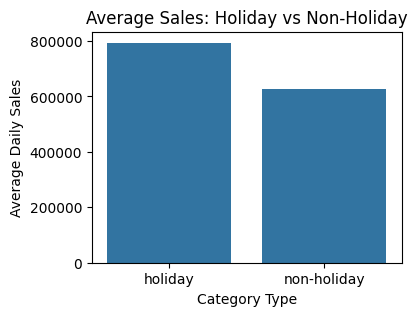

In [ ]:
plt.figure(figsize=(4, 3))
sns.barplot(x='category_type', y='sales', data=avg_sales)
plt.title('Average Sales: Holiday vs Non-Holiday')
plt.xlabel('Category Type')
plt.ylabel('Average Daily Sales')
plt.show()


In [ ]:
holiday_sales = avg_sales[avg_sales['category_type'] == 'holiday']['sales'].values[0]
non_holiday_sales = avg_sales[avg_sales['category_type'] == 'non-holiday']['sales'].values[0]

percentage_change = ((holiday_sales - non_holiday_sales) / non_holiday_sales) * 100
print(f"Percentage change in sales during holidays compared to non-holidays: {percentage_change:.2f}%")

Percentage change in sales during holidays compared to non-holidays: 26.61%


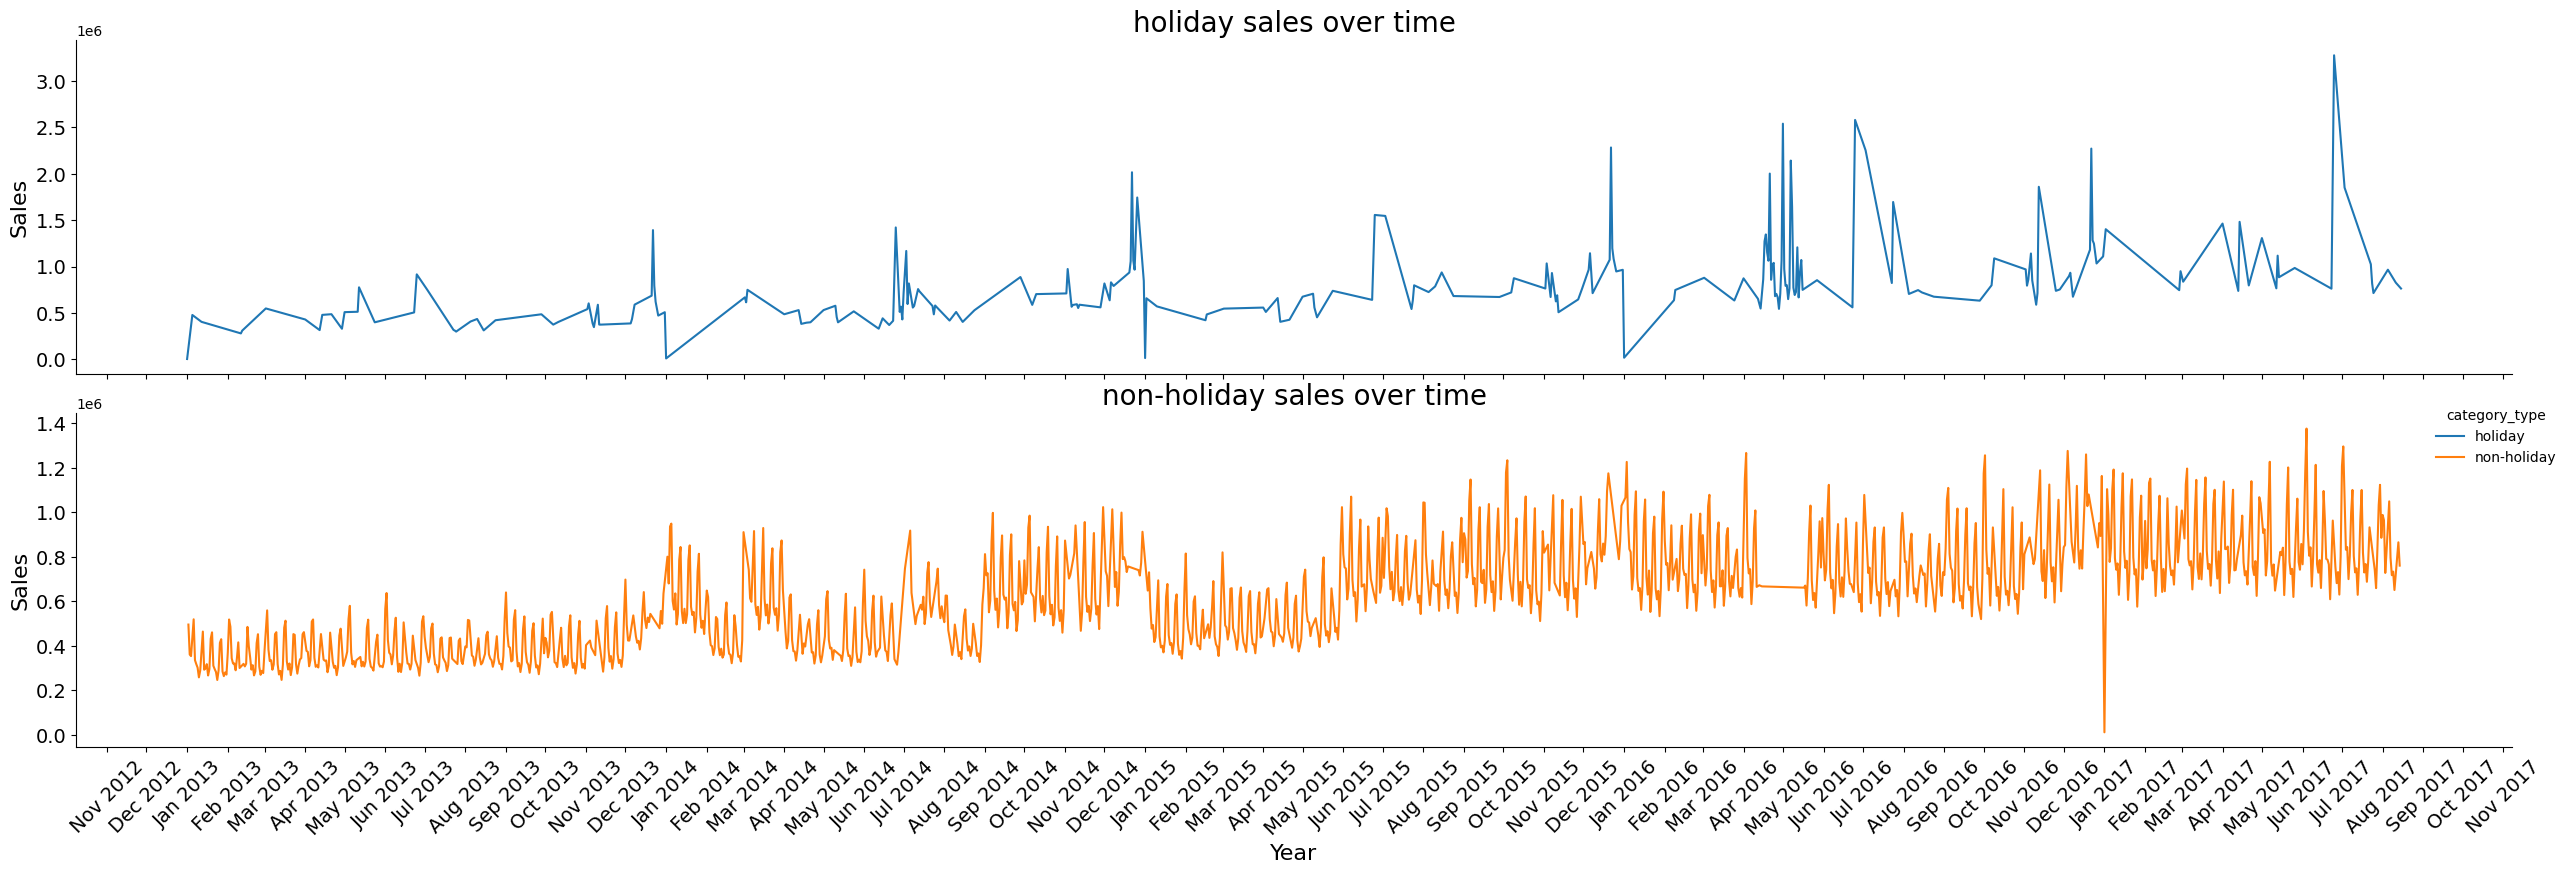

In [ ]:
import matplotlib.dates as mdates

# Plotting the line graph
g = sns.relplot(
    data=daily_sales, x='date', y='sales',
    kind='line', hue='category_type', col='category_type',
    errorbar=None, facet_kws={'sharey': False}, height=4, aspect=6, col_wrap=1
)

g.set_titles("{col_name} sales over time", size=20)  # Increase title font size

for ax in g.axes.flat:
    ax.set_xlabel("Year", fontsize=16)
    ax.set_ylabel("Sales", fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=14)

    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

g.add_legend(title_fontsize=16, fontsize=26)
plt.xticks(rotation=45)

plt.show()

In [ ]:
#Combining 2-line plot in one, comparing each of the category type
alt_chart_combined = alt.Chart(daily_sales).mark_line().encode(
    x='date:T',
    y='sales:Q',
    color=alt.Color('category_type:N', legend=alt.Legend(titleFontSize=16, labelFontSize=16)),
    tooltip=['date:T', 'sales:Q', 'category_type:N']
).properties(
    width=1400,
    height=500,
    title='Sales Over Time: Holiday vs Non-Holiday'
).interactive()

alt_chart_combined

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

## Visualization #2 [Promotion Effectiveness (Sales per Promotion) by Store]

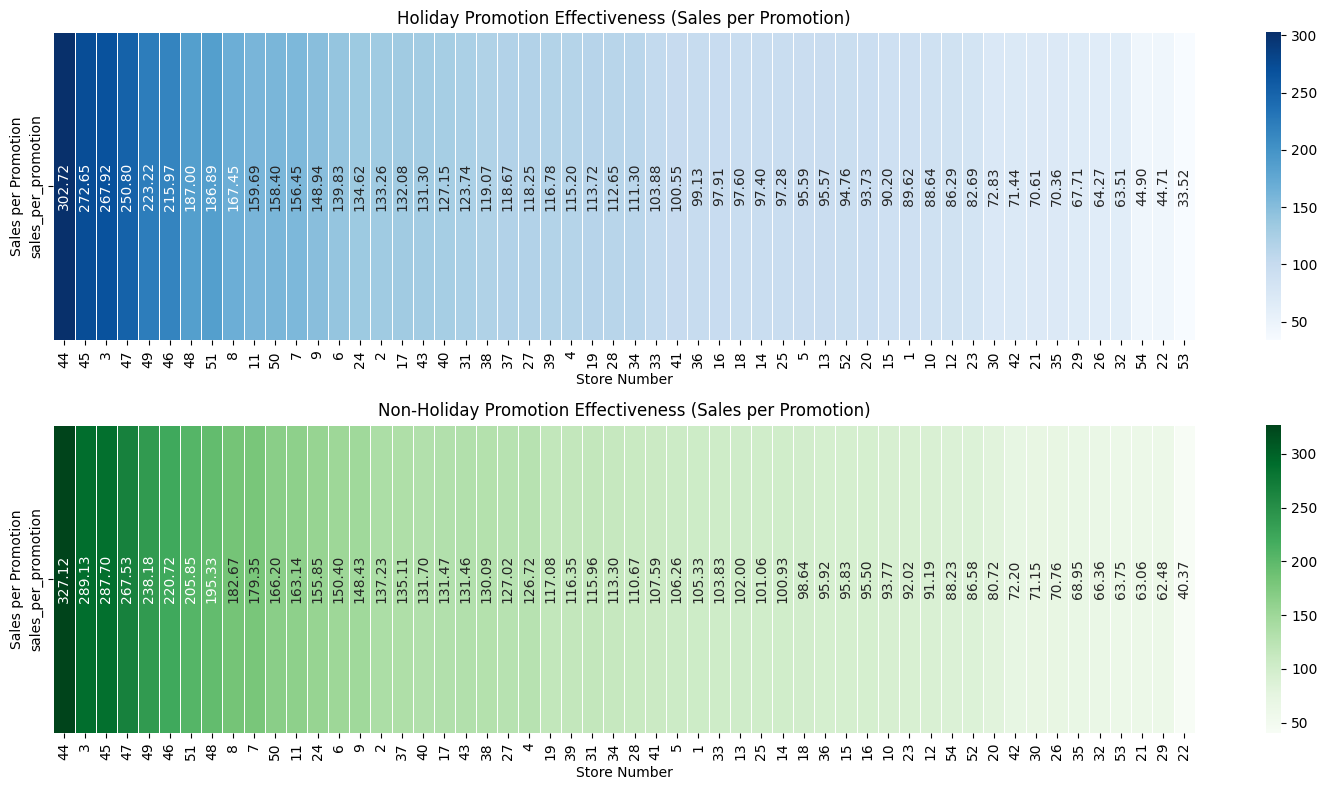

In [ ]:
# Separate data into holiday and non-holiday subsets
holiday_data = train[train['category_type'] == 'holiday']
non_holiday_data = train[train['category_type'] == 'non-holiday']

# Group by store and calculate total sales and promotions for both holiday and non-holiday
holiday_promotion_sales = holiday_data.groupby('store_nbr').agg(
    total_sales=('sales', 'sum'),
    total_promotions=('onpromotion', 'sum')
).reset_index()

non_holiday_promotion_sales = non_holiday_data.groupby('store_nbr').agg(
    total_sales=('sales', 'sum'),
    total_promotions=('onpromotion', 'sum')
).reset_index()

# Calculate promotion effectiveness by dividing total sales by total promotions
holiday_promotion_sales['sales_per_promotion'] = holiday_promotion_sales['total_sales'] /( holiday_promotion_sales['total_promotions'])
non_holiday_promotion_sales['sales_per_promotion'] = non_holiday_promotion_sales['total_sales'] /( non_holiday_promotion_sales['total_promotions'])

# Sort by effectiveness for heatmap
holiday_sorted = holiday_promotion_sales.sort_values(by='sales_per_promotion', ascending=False)
non_holiday_sorted = non_holiday_promotion_sales.sort_values(by='sales_per_promotion', ascending=False)

fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# Plot holiday sales promotion effectiveness
heatmap_data_holiday = holiday_sorted[['store_nbr', 'sales_per_promotion']].set_index('store_nbr').T
ax1 = sns.heatmap(heatmap_data_holiday, annot=True, cmap="Blues", fmt=".2f", linewidths=.5, ax=axes[0], annot_kws={"rotation": 90})
ax1.set_title('Holiday Promotion Effectiveness (Sales per Promotion)')
ax1.set_xlabel('Store Number')
ax1.set_ylabel('Sales per Promotion')

# Plot non-holiday sales promotion effectiveness
heatmap_data_non_holiday = non_holiday_sorted[['store_nbr', 'sales_per_promotion']].set_index('store_nbr').T
ax2 = sns.heatmap(heatmap_data_non_holiday, annot=True, cmap="Greens", fmt=".2f", linewidths=.5, ax=axes[1], annot_kws={"rotation": 90})
ax2.set_title('Non-Holiday Promotion Effectiveness (Sales per Promotion)')
ax2.set_xlabel('Store Number')
ax2.set_ylabel('Sales per Promotion')


plt.tight_layout()
plt.show()

## Visualization #3 [Earthquake VS Sales in affected State]

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same 

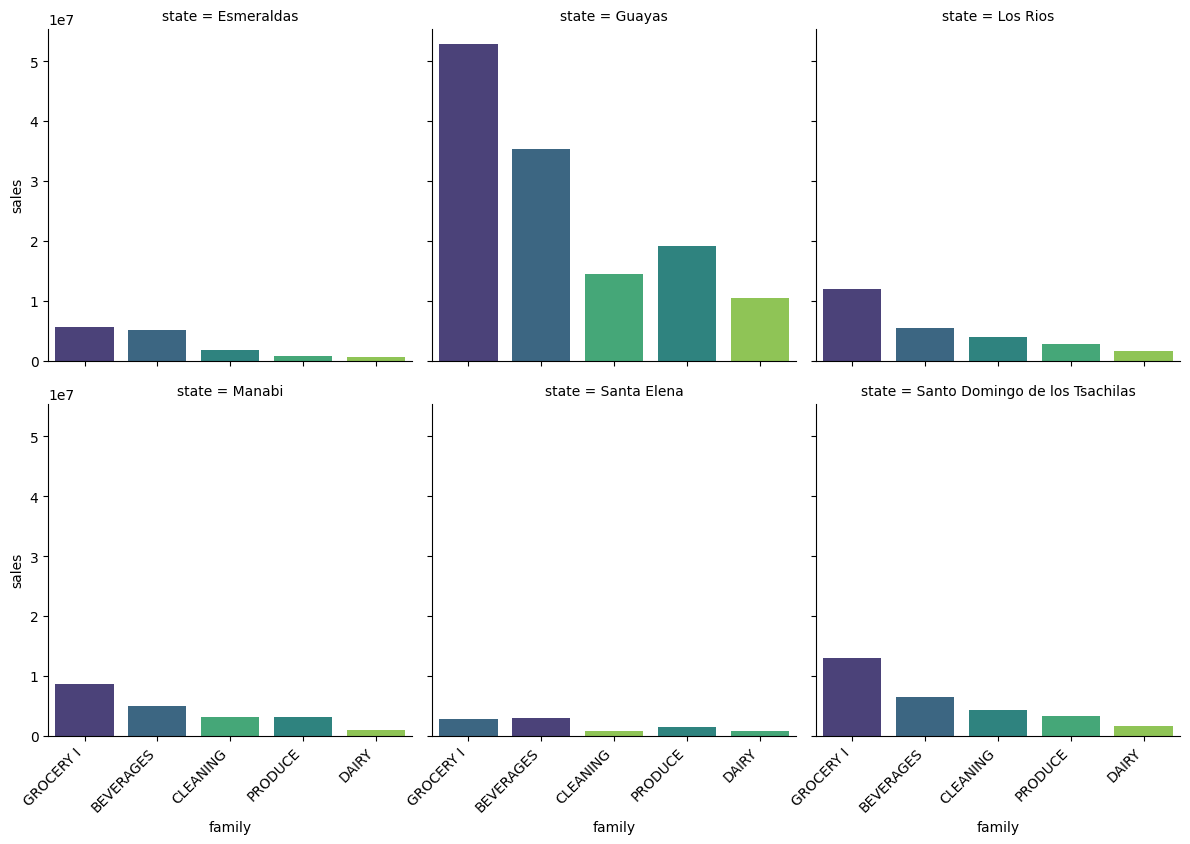

In [ ]:
selected_states = ['Manabi', 'Esmeraldas', 'Santa Elena', 'Guayas', 'Santo Domingo de los Tsachilas', 'Los Rios']
stores_filtered = train[train['state'].isin(selected_states)]

grouped_df = stores_filtered.groupby(['state', 'family'])['sales'].sum().reset_index()

# Find the top 5 families for each state
top_families = grouped_df.groupby('state').apply(lambda x: x.nlargest(5, 'sales')).reset_index(drop=True)

g = sns.FacetGrid(top_families, col='state', col_wrap=3, height=4)

g.map(sns.barplot, 'family', 'sales', palette='viridis')
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')
plt.show()

## Visualization #4 [Product Sales Trends and Oil Price Around the Earthquake]

In [ ]:
# Forward-fill missing oil prices, specifically for Saturday and Sunday
oil['day_of_week'] = oil['date'].dt.dayofweek  # Monday = 0, Sunday = 6

# Filter sales data around the earthquake date (e.g., two weeks before and four weeks after)
earthquake_date = pd.Timestamp('2016-04-16')
start_date = earthquake_date - pd.Timedelta(weeks=3)
end_date = earthquake_date + pd.Timedelta(weeks=4)

disaster_period_sales = train[(train['date'] >= start_date) & (train['date'] <= end_date)]
disaster_period_oil = oil[(oil['date'] >= start_date) & (oil['date'] <= end_date)]

In [ ]:
sales_during_disaster = disaster_period_sales.groupby(['date', 'family'])['sales'].sum().reset_index()

# Merge sales data with oil price data on the date
sales_oil_merged = pd.merge(sales_during_disaster.groupby('date')['sales'].sum().reset_index(),
                            disaster_period_oil[['date', 'dcoilwtico']], on='date', how='left')

sales_oil_merged['dcoilwtico'] = sales_oil_merged['dcoilwtico'].ffill()
mask = (oil['day_of_week'] == 5) | (oil['day_of_week'] == 6)
sales_oil_merged.loc[mask, 'dcoilwtico'] = sales_oil_merged['dcoilwtico'].ffill()

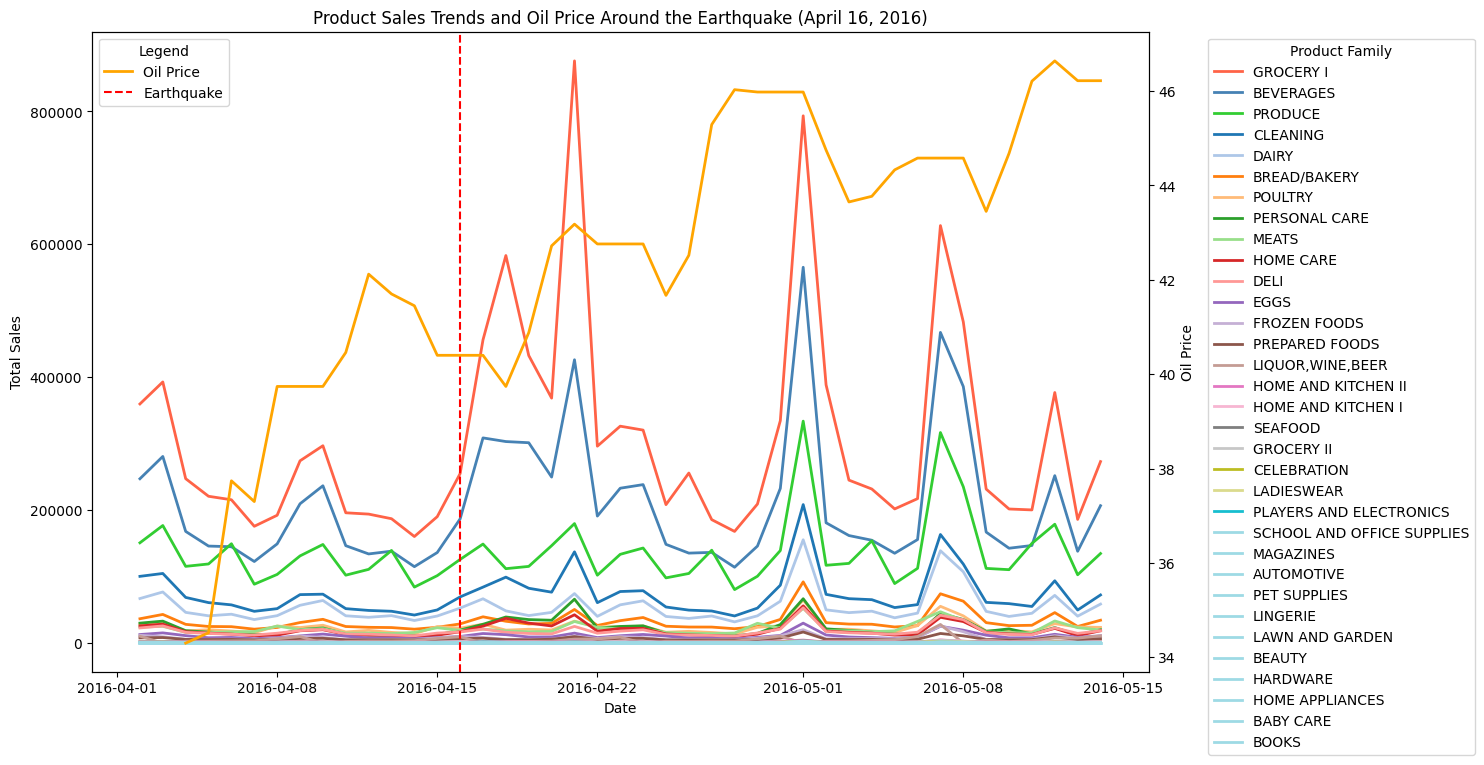

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Convert 'date' to datetime format in both datasets
train['date'] = pd.to_datetime(train['date'])
oil['date'] = pd.to_datetime(oil['date'])

# Forward-fill missing oil prices
oil['dcoilwtico'] = oil['dcoilwtico'].ffill()

# Add day_of_week to identify weekends
oil['day_of_week'] = oil['date'].dt.dayofweek  # Monday = 0, Sunday = 6

# Forward fill for weekends (Saturday = 5, Sunday = 6)
mask = (oil['day_of_week'] == 5) | (oil['day_of_week'] == 6)
oil.loc[mask, 'dcoilwtico'] = oil['dcoilwtico'].ffill()

# Define earthquake date and period of interest
earthquake_date = pd.Timestamp('2016-04-16')
start_date = earthquake_date - pd.Timedelta(weeks=2)
end_date = earthquake_date + pd.Timedelta(weeks=4)

# Filter sales data around the earthquake period
disaster_period_sales = train[(train['date'] >= start_date) & (train['date'] <= end_date)]

# Filter oil data around the same period
disaster_period_oil = oil[(oil['date'] >= start_date) & (oil['date'] <= end_date)]

# Group sales data by date and family, and sum the sales
sales_during_disaster = disaster_period_sales.groupby(['date', 'family'])['sales'].sum().reset_index()

# Calculate total sales per family and sort families by total sales in descending order
total_sales_by_family = sales_during_disaster.groupby('family')['sales'].sum().reset_index()
sorted_families = total_sales_by_family.sort_values(by='sales', ascending=False)['family'].tolist()

# Ensure sales data is ordered by the sorted families
sales_during_disaster['family'] = pd.Categorical(sales_during_disaster['family'], categories=sorted_families, ordered=True)
sales_during_disaster = sales_during_disaster.sort_values(['family', 'date'])

# Merge sales data with oil price data
sales_oil_merged = pd.merge(sales_during_disaster.groupby('date')['sales'].sum().reset_index(),
                            disaster_period_oil[['date', 'dcoilwtico']], on='date', how='left')

# Forward fill any remaining missing oil prices
sales_oil_merged['dcoilwtico'] = sales_oil_merged['dcoilwtico'].ffill()

# Create the plot
fig, ax1 = plt.subplots(figsize=(15, 8))

# Define custom colors for top 3 families
top_family_colors = ['#FF6347', '#4682B4', '#32CD32']  # Colors for the top 3 families

# Use the newer colormap API to avoid deprecation warning and sample colors
colors = mpl.colormaps['tab20'](range(len(sorted_families) - 3))  # Get the colormap and sample required number of colors

# Plot sales on the left y-axis for each family, ordered by total sales
for i, family in enumerate(sorted_families):
    family_sales = sales_during_disaster[sales_during_disaster['family'] == family]

    # Assign specific colors to the top 3 families, and colormap for others
    if i < 3:
        color = top_family_colors[i]
    else:
        color = colors[i - 3]  # Start from the 4th color in the colormap

    ax1.plot(family_sales['date'], family_sales['sales'],
             label=family, color=color, linestyle='-', linewidth=2)

# Add labels and title for the sales plot
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Sales')
ax1.set_title('Product Sales Trends and Oil Price Around the Earthquake (April 16, 2016)')

# Plot oil prices on the right y-axis
ax2 = ax1.twinx()  # Create a second y-axis that shares the same x-axis
oil_line, = ax2.plot(sales_oil_merged['date'], sales_oil_merged['dcoilwtico'], color='orange', label='Oil Price', linestyle='-', linewidth=2)
ax2.set_ylabel('Oil Price')

# Plot the earthquake line on the first axis
earthquake_line = ax1.axvline(earthquake_date, color='red', linestyle='--', label='_nolegend_')  # Use '_nolegend_' to exclude earthquake from Product Family legend

# Combine oil price and earthquake lines into the same legend
lines = [oil_line, earthquake_line]
labels = ['Oil Price', 'Earthquake']

# Add legends for sales and combine oil price and earthquake
ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title='Product Family')  # Legend for product families
ax2.legend(lines, labels, loc='upper left', title='Legend')  # Combined legend for oil price and earthquake (now top-left)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()